In [4]:
import psycopg2

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA")
curr = conn.cursor()

In [72]:
curr.execute("SELECT DATE_TRUNC('week', visit_dttm) AS week, \
            COUNT(DISTINCT msu_analytics.client.client_rk) AS client_key_count, \
            COUNT(DISTINCT msu_analytics.account.account_rk) AS account_key_count, \
            COUNT(DISTINCT msu_analytics.application.account_rk) AS applications_key_count, \
            SUM(case when msu_analytics.game.finish_flg = 1 then 1 else 0 end) AS games_count \
            FROM msu_analytics.client \
            LEFT JOIN msu_analytics.account ON msu_analytics.client.client_rk = msu_analytics.account.client_rk \
            LEFT JOIN msu_analytics.application ON msu_analytics.account.account_rk = msu_analytics.application.account_rk \
            LEFT JOIN msu_analytics.game ON msu_analytics.game.game_rk = msu_analytics.application.game_rk \
            GROUP BY week \
            ORDER BY week")

In [73]:
weekly = curr.fetchall()
data_weekly = pd.DataFrame(weekly, columns=['week', 'client_key_count', 'account_key_count', 'applications_key_count', 'games_count'])

In [152]:
data_weekly.head()

,week,client_key_count,account_key_count,applications_key_count,games_count
0,2022-08-29,111,32,7,3
1,2022-09-05,184,31,6,2
2,2022-09-12,167,43,16,5
3,2022-09-19,181,45,12,12
4,2022-09-26,195,59,17,10


In [82]:
data_weekly.shape

(23, 5)

In [76]:
curr.execute("SELECT DATE_TRUNC('month', visit_dttm) AS month, \
            COUNT(DISTINCT msu_analytics.client.client_rk) AS client_key_count, \
            COUNT(DISTINCT msu_analytics.account.account_rk) AS account_key_count, \
            COUNT(DISTINCT msu_analytics.application.account_rk) AS applications_key_count, \
            SUM(case when msu_analytics.game.finish_flg = 1 then 1 else 0 end) AS games_count \
            FROM msu_analytics.client \
            LEFT JOIN msu_analytics.account ON msu_analytics.client.client_rk = msu_analytics.account.client_rk \
            LEFT JOIN msu_analytics.application ON msu_analytics.account.account_rk = msu_analytics.application.account_rk \
            LEFT JOIN msu_analytics.game ON msu_analytics.game.game_rk = msu_analytics.application.game_rk \
            GROUP BY month \
            ORDER BY month")

In [77]:
monthly = curr.fetchall()
data_monthly = pd.DataFrame(monthly, columns=['month', 'client_key_count', 'account_key_count', 'applications_key_count', 'games_count'])

In [78]:
data_monthly.head()

,month,client_key_count,account_key_count,applications_key_count,games_count
0,2022-09-01,778,190,51,28
1,2022-10-01,843,217,65,32
2,2022-11-01,786,200,56,39
3,2022-12-01,805,196,57,20
4,2023-01-01,852,213,64,14


In [84]:
data_monthly.shape

(6, 5)

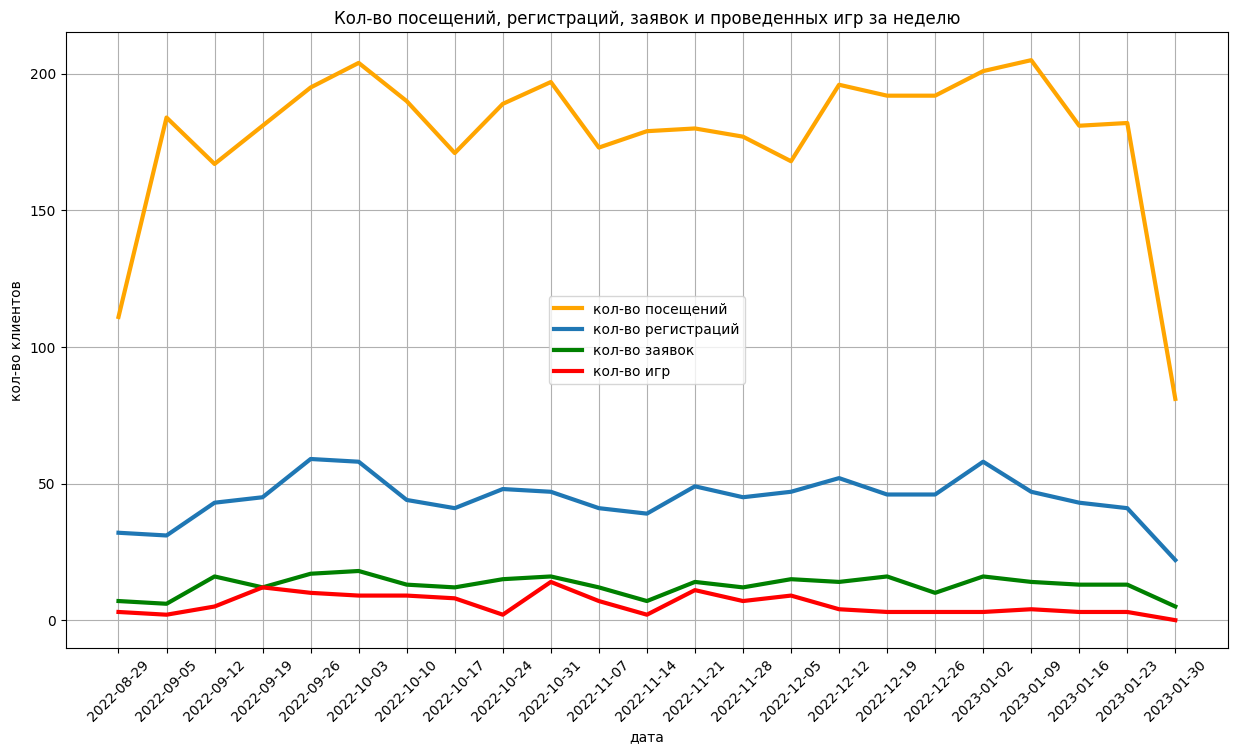

In [155]:
plt.figure(figsize=(15, 8))
plt.plot (data_weekly['week'].astype(str), data_weekly['client_key_count'], color='orange', label='кол-во посещений', linewidth= 3)
plt.plot (data_weekly['week'].astype(str), data_weekly['account_key_count'], label='кол-во регистраций', linewidth= 3 )
plt.plot (data_weekly['week'].astype(str), data_weekly['applications_key_count'], color='green', label='кол-во заявок', linewidth= 3)
plt.plot (data_weekly['week'].astype(str), data_weekly['games_count'], color='red', label='кол-во игр', linewidth= 3)
plt.title('Кол-во посещений, регистраций, заявок и проведенных игр за неделю')
plt.xlabel('дата')
plt.ylabel('кол-во клиентов')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

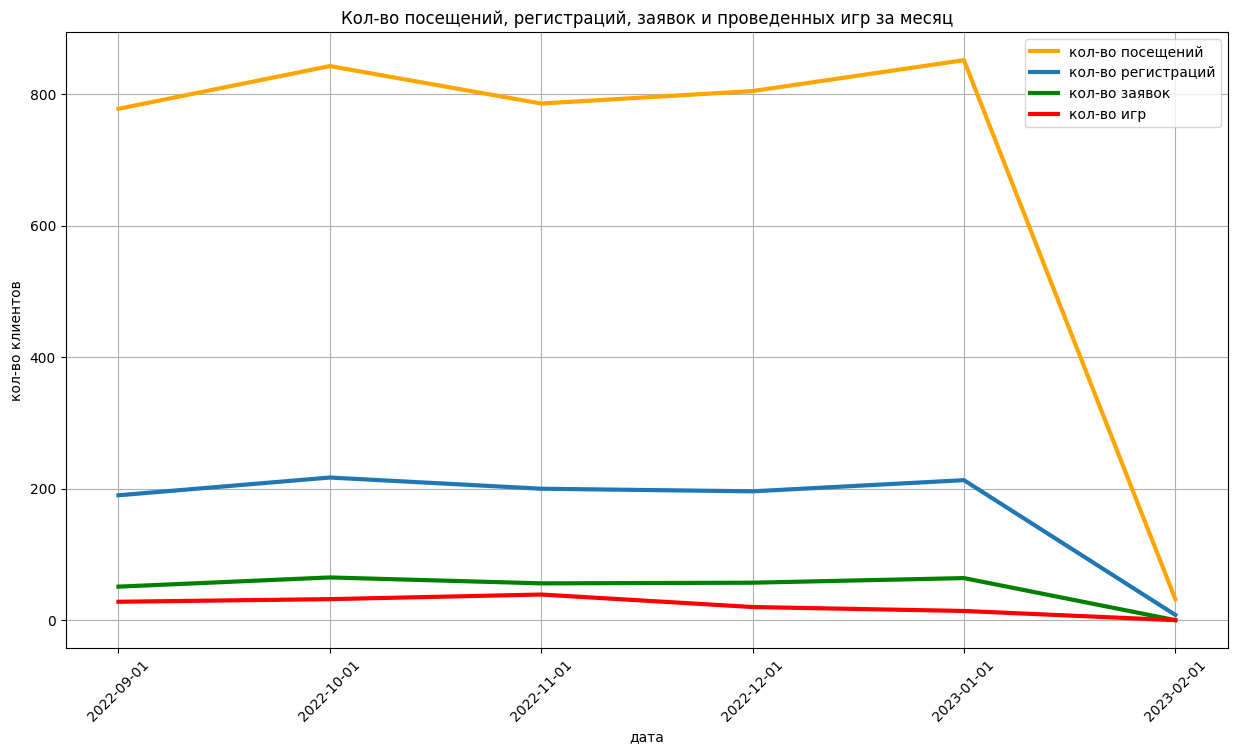

In [156]:
plt.figure(figsize=(15, 8))
plt.plot (data_monthly['month'].astype(str), data_monthly['client_key_count'], color='orange', label='кол-во посещений', linewidth= 3)
plt.plot (data_monthly['month'].astype(str), data_monthly['account_key_count'], label='кол-во регистраций', linewidth= 3 )
plt.plot (data_monthly['month'].astype(str), data_monthly['applications_key_count'], color='green', label='кол-во заявок', linewidth= 3)
plt.plot (data_monthly['month'].astype(str), data_monthly['games_count'], color='red', label='кол-во игр', linewidth= 3)
plt.title('Кол-во посещений, регистраций, заявок и проведенных игр за месяц')
plt.xlabel('дата')
plt.ylabel('кол-во клиентов')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

Для более наглядного анализа разницы между кол-вом регистраций, заявок и проведенных игр рассмотрим следующие графики (исходя из предыдущих графиков видим, что кол-во посещений сильно превышает остальные показатели, из-за чего шкала по оси У имеет большой шаг)

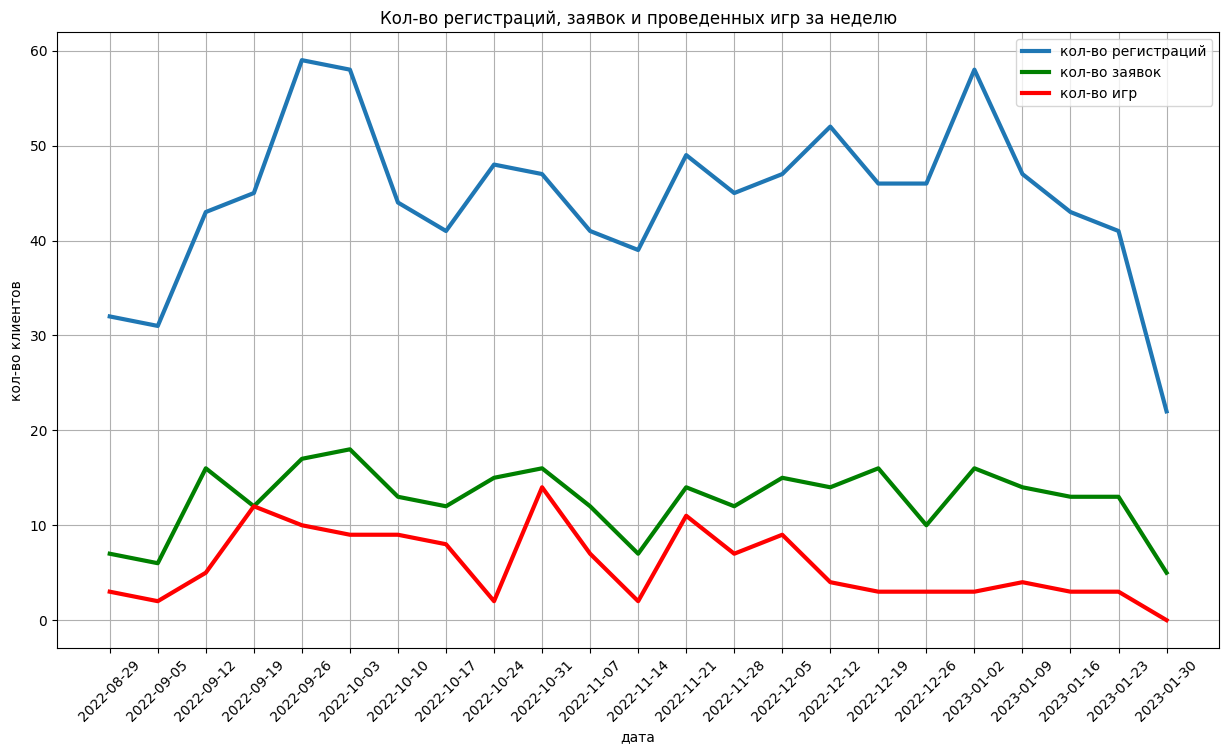

In [157]:
plt.figure(figsize=(15, 8))
plt.plot (data_weekly['week'].astype(str), data_weekly['account_key_count'], label='кол-во регистраций', linewidth= 3 )
plt.plot (data_weekly['week'].astype(str), data_weekly['applications_key_count'], color='green', label='кол-во заявок', linewidth= 3)
plt.plot (data_weekly['week'].astype(str), data_weekly['games_count'], color='red', label='кол-во игр', linewidth= 3)
plt.title('Кол-во регистраций, заявок и проведенных игр за неделю')
plt.xlabel('дата')
plt.ylabel('кол-во клиентов')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

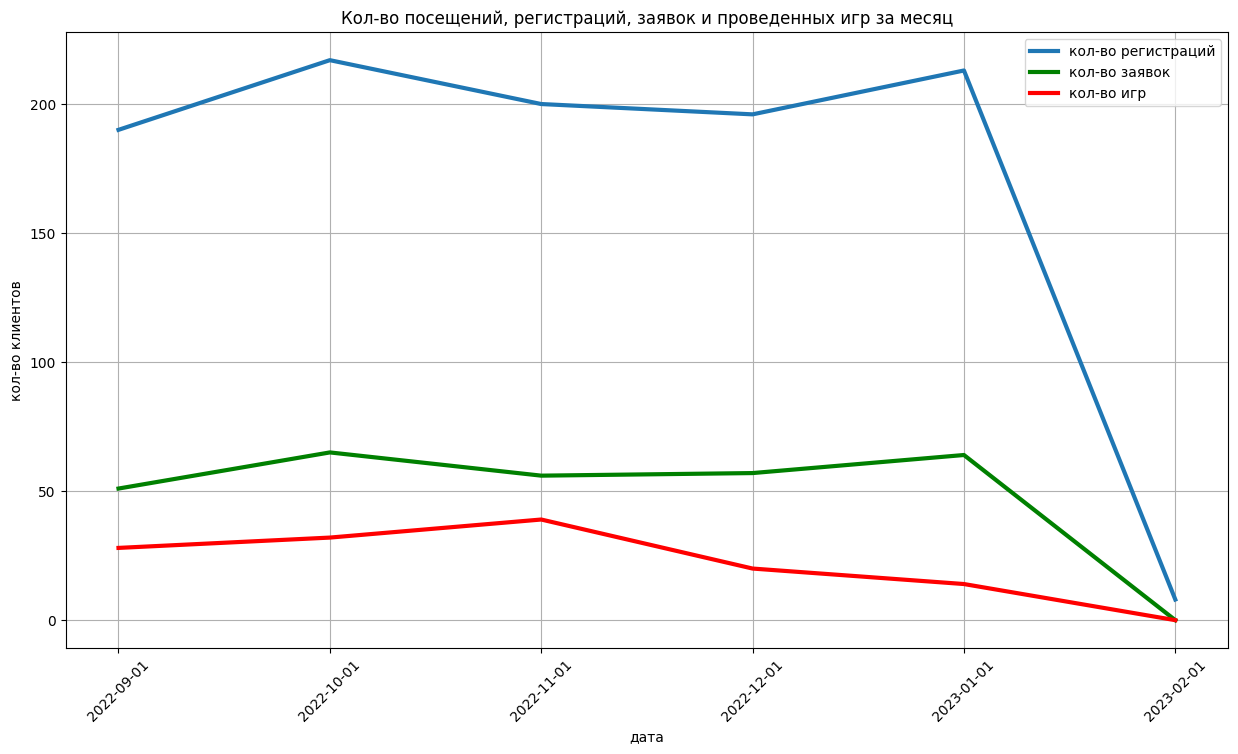

In [158]:
plt.figure(figsize=(15, 8))
plt.plot (data_monthly['month'].astype(str), data_monthly['account_key_count'], label='кол-во регистраций', linewidth= 3 )
plt.plot (data_monthly['month'].astype(str), data_monthly['applications_key_count'], color='green', label='кол-во заявок', linewidth= 3)
plt.plot (data_monthly['month'].astype(str), data_monthly['games_count'], color='red', label='кол-во игр', linewidth= 3)
plt.title('Кол-во посещений, регистраций, заявок и проведенных игр за месяц')
plt.xlabel('дата')
plt.ylabel('кол-во клиентов')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

Рассчитаем доли кол-ва регистраций, заявок и проведенных игр от кол-ва посещений сайта

In [144]:
reg_weekly = data_weekly['account_key_count'] / data_weekly['client_key_count'] * 100 #регистрации
app_weekly = data_weekly['applications_key_count'] / data_weekly['client_key_count'] * 100 #заявки
games_weekly = data_weekly['games_count'] / data_weekly['client_key_count'] * 100 #проведенные игры

In [145]:
reg_monthly = data_monthly['account_key_count'] / data_monthly['client_key_count'] * 100 #регистрации
app_monthly = data_monthly['applications_key_count'] / data_monthly['client_key_count'] * 100 #заявки
games_monthly = data_monthly['games_count'] / data_monthly['client_key_count'] * 100 #проведенные игры

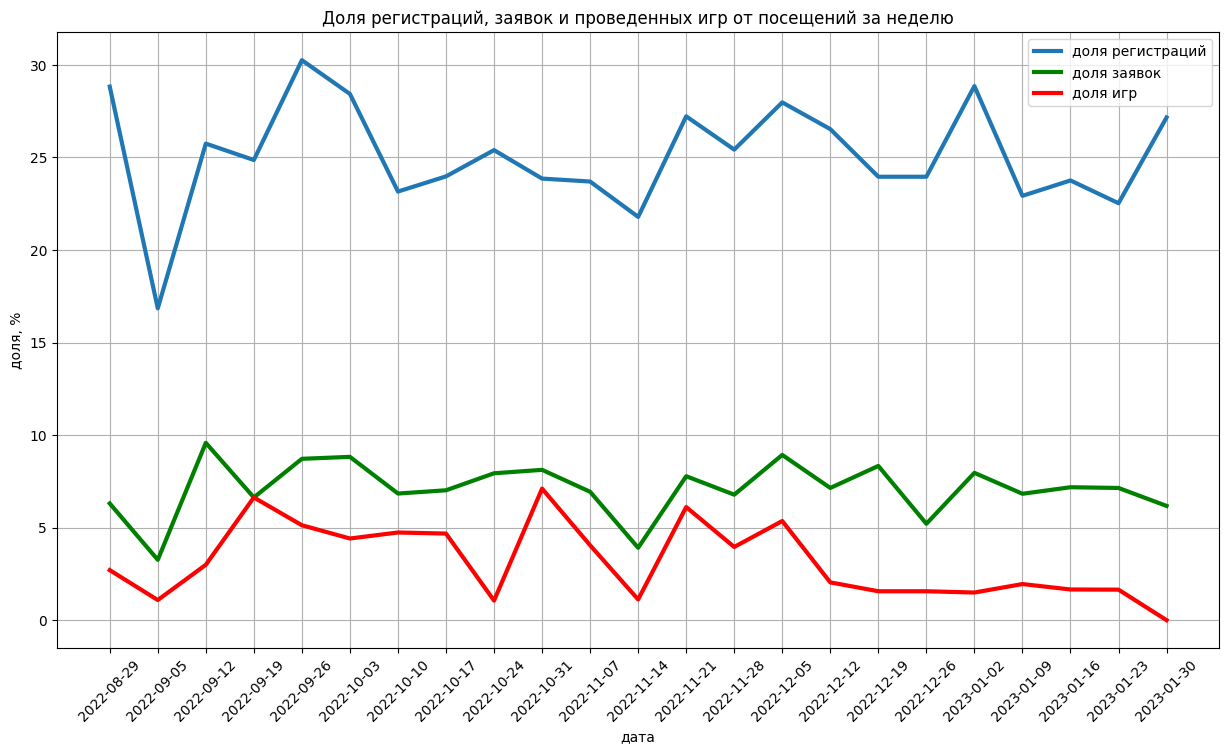

In [159]:
plt.figure(figsize=(15, 8))
plt.plot (data_weekly['week'].astype(str), reg_weekly, label='доля регистраций', linewidth= 3)
plt.plot (data_weekly['week'].astype(str), app_weekly, color='green', label='доля заявок', linewidth= 3)
plt.plot (data_weekly['week'].astype(str), games_weekly, color='red', label='доля игр', linewidth= 3)
plt.title('Доля регистраций, заявок и проведенных игр от посещений за неделю')
plt.xlabel('дата')
plt.ylabel('доля, %')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

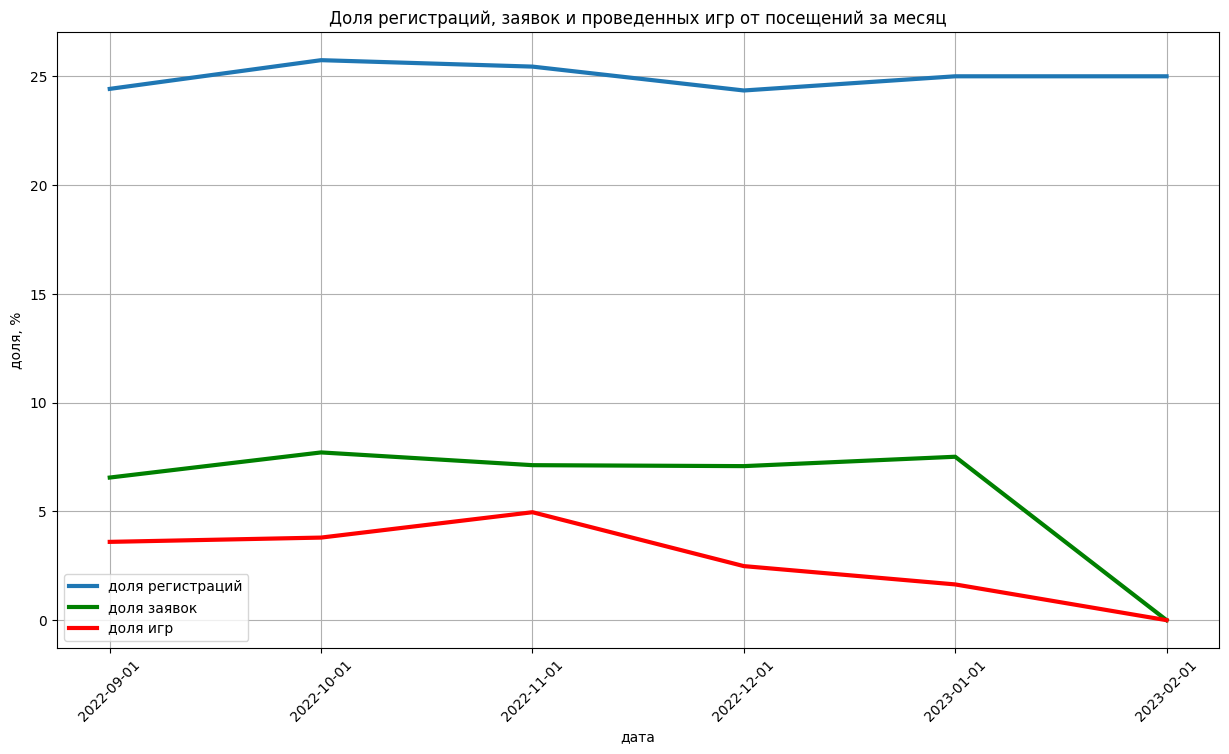

In [160]:
plt.figure(figsize=(15, 8))
plt.plot (data_monthly['month'].astype(str), reg_monthly, label='доля регистраций', linewidth= 3)
plt.plot (data_monthly['month'].astype(str), app_monthly, color='green', label='доля заявок', linewidth= 3)
plt.plot (data_monthly['month'].astype(str), games_monthly, color='red', label='доля игр', linewidth= 3)
plt.title('Доля регистраций, заявок и проведенных игр от посещений за месяц')
plt.xlabel('дата')
plt.ylabel('доля, %')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best')
plt.grid()

# Выводы:

Делать выводы проще по графикам в долях, так как уже посчитано соотношение и не надо зрительно обращать на это внимание, более того, в таком случае результат будет более точным. График по неделям не имеет какой-то стаблильности, показатели то убывают, то возрастают, однако на графике по месяцам мы видим, что показатели примерно одинаковые, то есть большие различия по неделям уравновешивают друг друга и по месяцам уже видее усредненный показетель,и являющийся более объективным и более удобным для анализа.

По графику видно, что до Нового 2023 года кол-во посещений, регистраций, заявок и проведенных игр примерно на постоянном уровне, имея незначительные возрастания и убывания, однако после Нового года кол-во посещений, регистраций, заявок и проведенных игр резко падает.

Несмотря на то что кол-во посещений также сильно уменьшается после Нового года, доли заявок и проведенных игр от посещений все равно сильно падают (то есть кол-во заявок и проведенных игр уменьшается еще сильнее), доля регистраций остается такой же (это связано с тем что кол-во посещений тоже упало). Это можно объяснить тем, что на многие уезжают на новогодние праздники, студенты сдают сессию, многие проводят время дома, из-за этого показатели упали.

Можно проводить новогодние акции на игры, дав дополнительную рекламу об этом, чтобы привлечь больше клиентов после Нового года.